In [1]:
documents_directory = 'documents'


In [2]:
import os

documents = []
for root, dirs, files in os.walk(documents_directory):
    for file in files:
        if file.endswith(".docx"):
            documents.append(os.path.join(root, file))

for file in documents:
    print(file)


documents/sub-folder/样本.docx


In [3]:
import docx

def read_txt(filename)->str:
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)


full_text = []
for file in documents:
    full_text.append(read_txt(file))
    with open('document.txt', 'w') as txt_file:
        txt_file.write(read_txt(file))
        continue


In [4]:
import jieba

jieba.load_userdict('dict.txt')

userdict_list = ['阿Ｑ', '孔乙己', '单四嫂子']

word_cloud_directory = 'word_cloud'

stopwords_path = word_cloud_directory + '/wc_cn/stopwords_cn_en.txt'

# The function for processing text with Jieba
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/y5/kd98q8h54ls52jhthlbldc740000gn/T/jieba.cache
Loading model cost 1.004 seconds.
Prefix dict has been built succesfully.


In [5]:
from wordcloud import WordCloud, ImageColorGenerator
from imageio import imread
import matplotlib.pyplot as plt


font_path = word_cloud_directory + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'
back_coloring = imread(word_cloud_directory + '/wc_cn/LuXun_color.jpg')

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=back_coloring,
               max_font_size=100, random_state=42, width=2000, height=2000, margin=2,)

text = open('document.txt').read()
wc.generate(jieba_processing_txt(text))

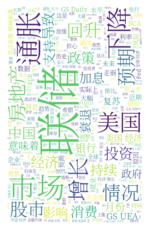

In [6]:
# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.to_file('image.jpg')
with open('image.svg', 'w') as svg_file:
    svg_file.write(wc.to_svg())


